In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
le = pd.read_csv('DataSet.csv', sep=',')
le.dataframeName = 'DataSet.csv'
le.head()

,Variable,row,age,sex,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31,b32,b33,b34,b35,b36,...,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,maharat ej,raftar gheir ej,parkhash,bartari,rabete hamsal
0,NaN,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,4.0,2.0,1.0,5.0,3.0,5.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,3.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,168.0,15.0,28.0,16.0,42.0,22.0,48.0,170.0,89.0,20.0,17.0,17.0,25.0
1,NaN,2,NaN,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,2.0,1.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,1.0,4.0,3.0,3.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,...,1.0,5.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,1.0,3.0,4.0,2.0,3.0,2.0,3.0,4.0,1.0,2.0,2.0,4.0,3.0,2.0,5.0,5.0,170.0,18.0,26.0,17.0,43.0,21.0,47.0,171.0,80.0,19.0,26.0,17.0,28.0
2,NaN,3,NaN,1.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,3.0,1.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,135.0,15.0,31.0,18.0,34.0,27.0,42.0,171.0,81.0,14.0,17.0,9.0,14.0
3,NaN,4,NaN,1.0,2.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,5.0,4.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,5.0,3.0,3.0,1.0,1.0,4.0,5.0,2.0,2.0,2.0,2.0,5.0,2.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,5.0,3.0,1.0,5.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,5.0,1.0,1.0,1.0,155.0,24.0,29.0,20.0,45.0,25.0,53.0,193.0,84.0,14.0,20.0,18.0,19.0
4,NaN,5,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,5.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,1.0,1.0,4.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,5.0,1.0,1.0,4.0,1.0,4.0,5.0,1.0,1.0,152.0,24.0,25.0,12.0,40.0,22.0,38.0,159.0,74.0,11.0,23.0,21.0,23.0


## DATA PREPROCESSING
### -Data Cleaning:


In [77]:
# Modify the original names of the features using a standard format for all the features.
orig_cols = list(le.columns) 
new_cols = [] 
for col in orig_cols:     
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower()) 

le.columns = new_cols

# Compute a summary of statistics only for the numerical features.
le.describe()

,variable,row,age,sex,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31,b32,b33,b34,b35,b36,...,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,maharat_ej,raftar_gheir_ej,parkhash,bartari,rabete_hamsal
count,0.0,180.000000,0.0,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,NaN,90.500000,NaN,1.50000,2.437500,2.487500,1.806250,1.893750,1.962500,1.850000,1.925000,1.468750,2.168750,2.312500,2.575000,2.337500,2.875000,2.53125,1.662500,2.006250,2.187500,3.012500,3.106250,3.525000,2.143750,2.162500,2.100000,3.806250,2.706250,3.093750,1.587500,1.768750,3.375000,3.706250,2.218750,1.668750,2.106250,2.000000,3.431250,2.187500,...,1.487500,2.518750,1.54375,2.143750,1.606250,1.618750,1.462500,1.343750,1.956250,2.643750,1.725000,1.556250,3.381250,2.443750,2.018750,3.518750,2.387500,2.4875,4.018750,1.893750,1.806250,3.850000,1.956250,3.437500,1.943750,2.10625,3.593750,153.768750,20.218750,27.412500,18.550000,43.856250,26.400000,48.443750,186.037500,72.675000,18.643750,21.606250,16.237500,24.606250
std,NaN,52.105662,NaN,0.50157,1.050232,1.263854,0.865094,1.073388,0.924084,1.023006,0.994007,0.875393,1.100154,1.065098,1.141278,1.273274,1.247639,1.25854,1.057394,1.012481,0.978945,1.248836,1.256915,1.154428,1.120685,1.175684,1.100029,1.173592,1.343968,1.282671,0.892932,1.035361,1.267643,1.141536,1.147444,0.975949,1.179473,1.121544,1.241939,0.998033,...,1.021699,1.326896,0.94401,1.331037,1.093703,1.080833,0.903435,0.854488,1.433415,1.446518,1.081287,1.038546,1.461764,1.306716,1.236102,1.496209,1.475108,1.4493,1.314993,1.236738,1.205318,1.269873,1.156588,1.311236,1.279971,1.34864,1.361173,18.631893,3.834094,4.331234,4.938362,9.710169,5.695855,7.819301,29.319512,8.966429,6.596499,8.474228,5.818521,4.662303
min,NaN,1.000000,NaN,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,107.000000,8.000000,15.000000,8.000000,22.000000,12.000000,25.000000,103.000000,52.000000,11.000000,12.000000,6.000000,9.000000
25%,NaN,45.750000,NaN,1.00000,1.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.750000,2.000000,1.000000,2.000000,2.00000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000

In [78]:
# Discard the metadata (age and variable and row).
le = le.drop(['age', 'variable', 'row'], axis=1)

In [79]:
le.head()

,sex,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26,b27,b28,b29,b30,b31,b32,b33,b34,b35,b36,b37,b38,b39,...,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,maharat_ej,raftar_gheir_ej,parkhash,bartari,rabete_hamsal
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,4.0,2.0,1.0,5.0,3.0,5.0,2.0,1.0,1.0,4.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,3.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,168.0,15.0,28.0,16.0,42.0,22.0,48.0,170.0,89.0,20.0,17.0,17.0,25.0
1,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,2.0,1.0,1.0,2.0,4.0,4.0,2.0,2.0,2.0,1.0,4.0,3.0,3.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,...,1.0,5.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,1.0,3.0,4.0,2.0,3.0,2.0,3.0,4.0,1.0,2.0,2.0,4.0,3.0,2.0,5.0,5.0,170.0,18.0,26.0,17.0,43.0,21.0,47.0,171.0,80.0,19.0,26.0,17.0,28.0
2,1.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,3.0,1.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,4.0,...,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,135.0,15.0,31.0,18.0,34.0,27.0,42.0,171.0,81.0,14.0,17.0,9.0,14.0
3,1.0,2.0,5.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,5.0,4.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,5.0,3.0,3.0,1.0,1.0,4.0,5.0,2.0,2.0,2.0,2.0,5.0,2.0,3.0,2.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,5.0,3.0,1.0,5.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,5.0,1.0,1.0,1.0,155.0,24.0,29.0,20.0,45.0,25.0,53.0,193.0,84.0,14.0,20.0,18.0,19.0
4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,5.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,1.0,1.0,4.0,2.0,4.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,5.0,1.0,1.0,4.0,1.0,4.0,5.0,1.0,1.0,152.0,24.0,25.0,12.0,40.0,22.0,38.0,159.0,74.0,11.0,23.0,21.0,23.0


In [80]:
# For each feature count all rows with NULL values.
le.isnull().sum()

sex                20
b1                 20
b2                 20
b3                 20
b4                 20
                   ..
maharat_ej         20
raftar_gheir_ej    20
parkhash           20
bartari            20
rabete_hamsal      20
Length: 147, dtype: int64

In [81]:
# For each feature delete all rows with NULL values.
le.dropna(inplace=True)
le.isnull().sum()

sex                0
b1                 0
b2                 0
b3                 0
b4                 0
                  ..
maharat_ej         0
raftar_gheir_ej    0
parkhash           0
bartari            0
rabete_hamsal      0
Length: 147, dtype: int64

In [82]:
#Change column order to better perform splits
new_order3 = [134,135,136,137,138,139,140,141,142,143,144,145,146]
new_order2 = [134,142,143,144,145,146]
new_order = [135,136,137,138,139,140,141]

le2 = le[le.columns[new_order]]
le3 = le[le.columns[new_order2]]
le4 = le[le.columns[new_order3]]
le3.head()


,maharat,maharat_ej,raftar_gheir_ej,parkhash,bartari,rabete_hamsal
0,168.0,89.0,20.0,17.0,17.0,25.0
1,170.0,80.0,19.0,26.0,17.0,28.0
2,135.0,81.0,14.0,17.0,9.0,14.0
3,155.0,84.0,14.0,20.0,18.0,19.0
4,152.0,74.0,11.0,23.0,21.0,23.0


## - Data Exploration

In [83]:
# Get a concise summary of the dataset.
le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Columns: 147 entries, sex to rabete_hamsal
dtypes: float64(147)
memory usage: 185.0 KB


#### Box Plots

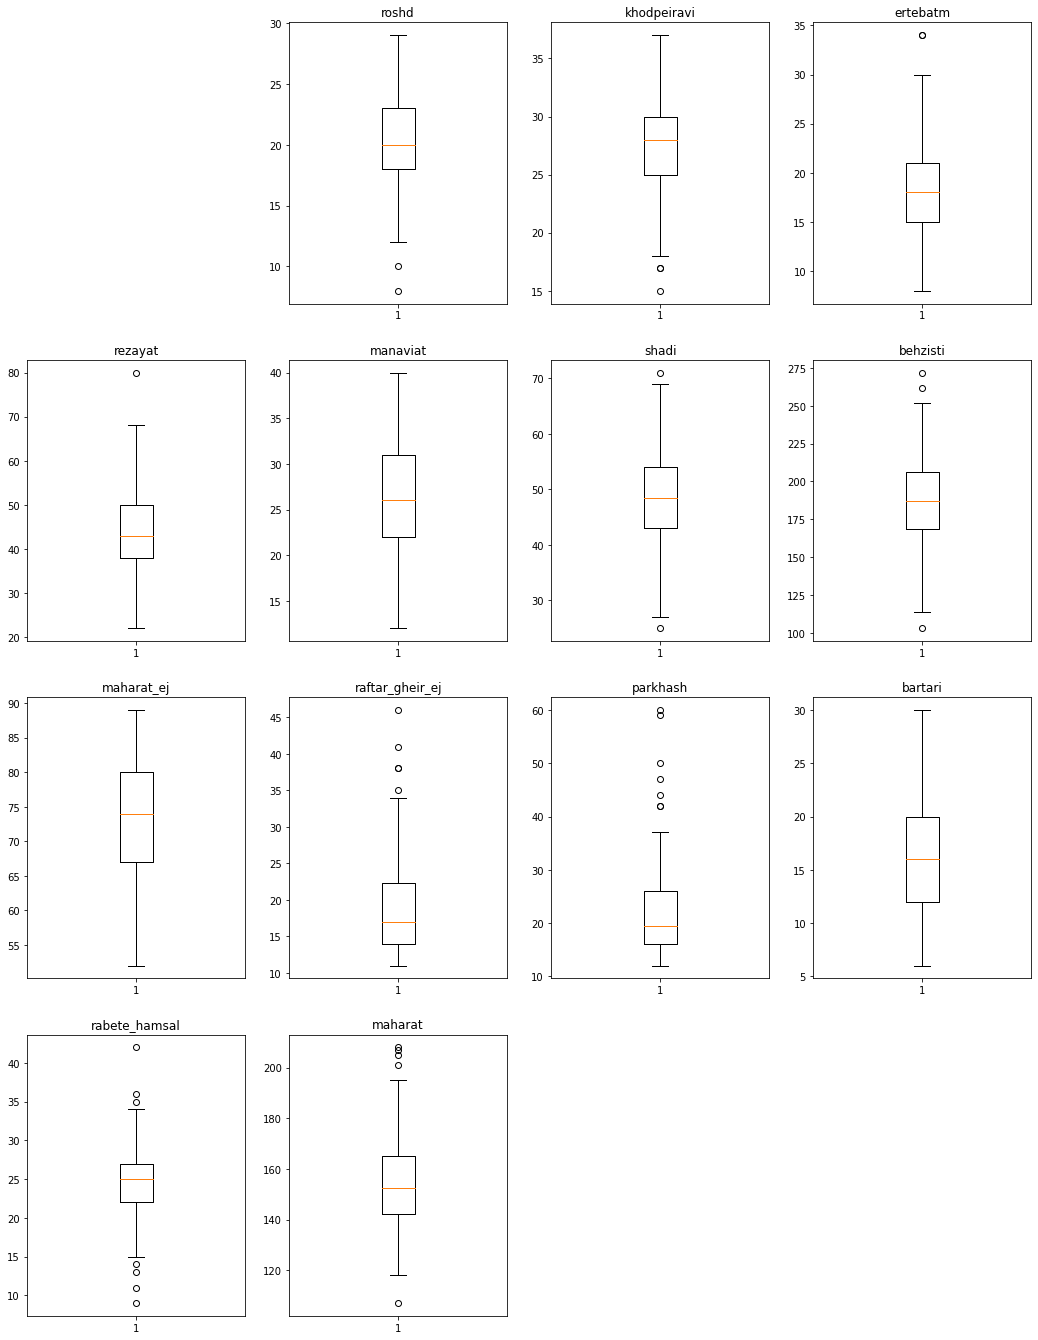

(160, 147)

In [84]:
# Create a dictionary of columns representing the features of the dataset.
col_dict = {'maharat':1,'roshd':2,'khodpeiravi':3,'ertebatm':4,'rezayat':5,'manaviat':6,'shadi':7,'behzisti':8,'maharat_ej':9, 'raftar_gheir_ej': 10,'parkhash': 11, 'bartari': 12, 'rabete_hamsal': 13, 'maharat': 14}

# Visualize the data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()
le.shape

In [85]:
# Remove the outliers using the interquartile range (IQR).
Q1 = le.quantile(0.25)
Q3 = le.quantile(0.75)
IQR = Q3 - Q1

le = le[~((le < (Q1 - 1.5 * IQR)) |(le > (Q3 + 1.5 * IQR))).any(axis=1)]


# Print the dimensions of the cleaned dataset.
le.shape

(19, 147)

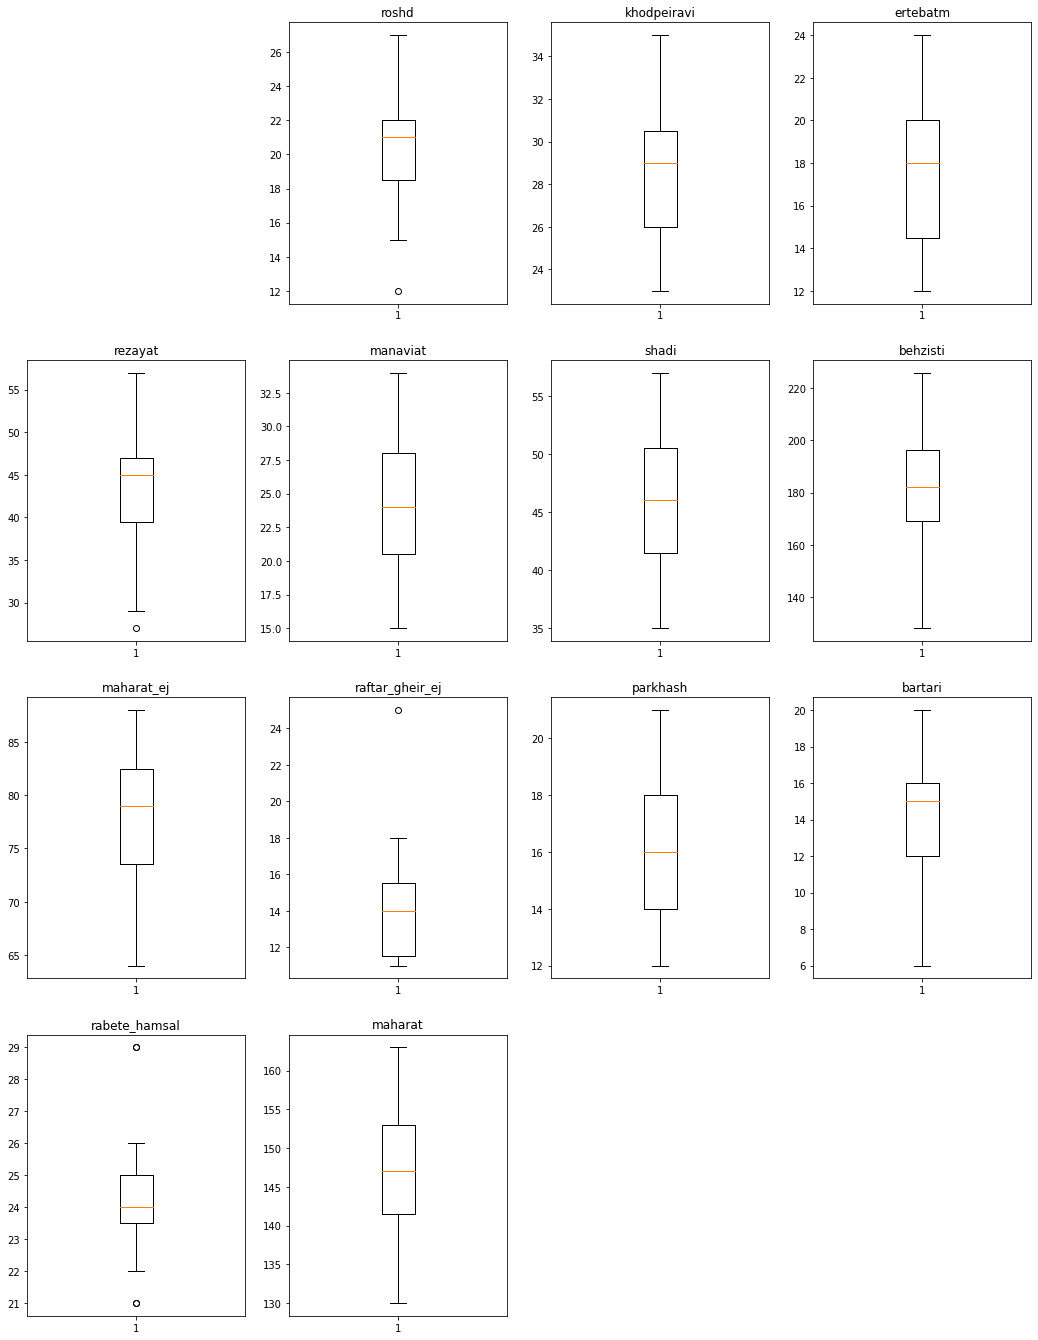

In [86]:
# Visualize the cleaned data for each feature using box plots.
plt.figure(figsize=(18,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)
plt.show()

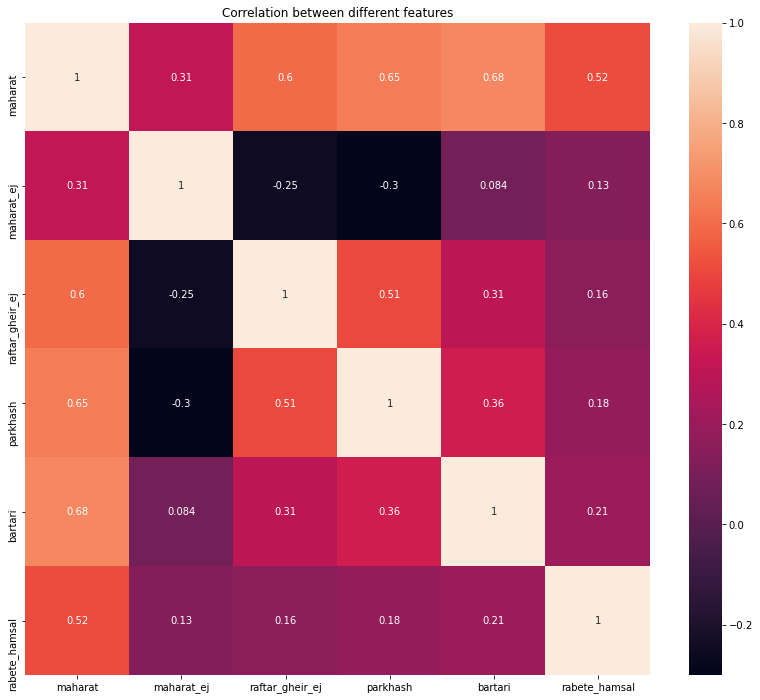

In [91]:
# Plot heatmap to visualize the correlations.
plt.figure(figsize = (14, 12))
sns.heatmap(le3.corr(), annot = True)
plt.title('Correlation between different features');

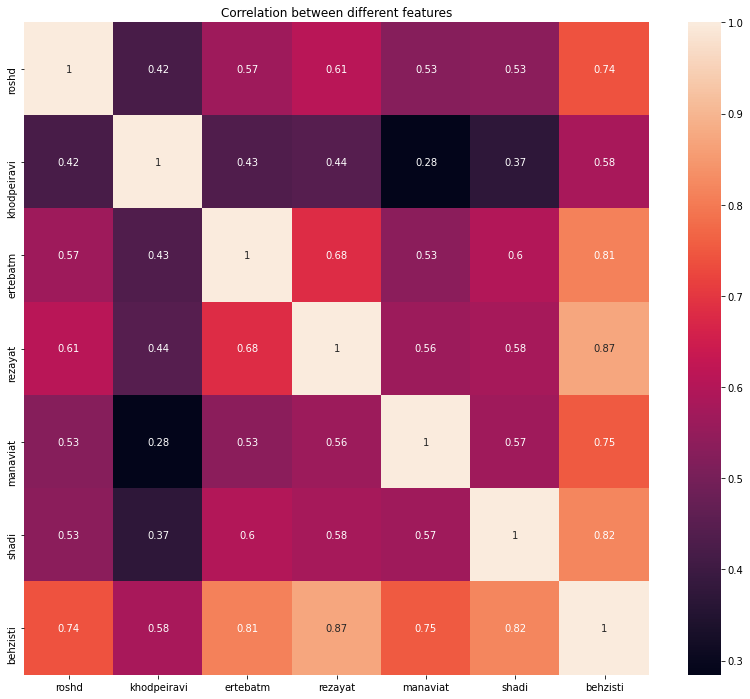

In [92]:
# Plot heatmap to visualize the correlations.
plt.figure(figsize = (14, 12))
sns.heatmap(le2.corr(), annot = True)
plt.title('Correlation between different features');

### Scatter Plots

In [89]:
# # Create a vector containing all the features of the dataset.
# all_col = ['adult_mortality','infant_deaths','alcohol','percentage_expenditure','hepatitis_b','measles','bmi',
#          'under-five_deaths','polio','total_expenditure','diphtheria','hiv/aids','gdp','population','thinness_1-19_years',
#          'thinness_5-9_years','income_composition_of_resources','schooling']

# plt.figure(figsize=(15,30))

# # Plot each feature in function of the target variable (life_expectancy) using scatter plots.
# for i in range(len(all_col)):
#     plt.subplot(7,3,i+1)
#     plt.scatter(le[all_col[i]], le['life_expectancy'])
#     plt.xlabel(all_col[i])
#     plt.ylabel('Life Expectancy')

# plt.show()

## - Features Extraction

## PCA

In [90]:
# inja ham hamona ro mizarim...